<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/NN/NN_K_ShalowNN_Sprirals_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow neural network with Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_s_curve
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

Using TensorFlow backend.


# 1. Create some artificial dataset

### 1.1 Fix random seed for reproducibility

In [0]:
seed = 7
np.random.seed(seed)

### 1.2 We need to generate two sets of data

In [0]:
def spirals(points, noise=.5):
    n = np.sqrt(np.random.rand(points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points),np.ones(points))))
  
  
X, y = spirals(1000)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(2000, 2)
(2000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 1.3 Spliting data into train and test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 1.4 Visualization of the data

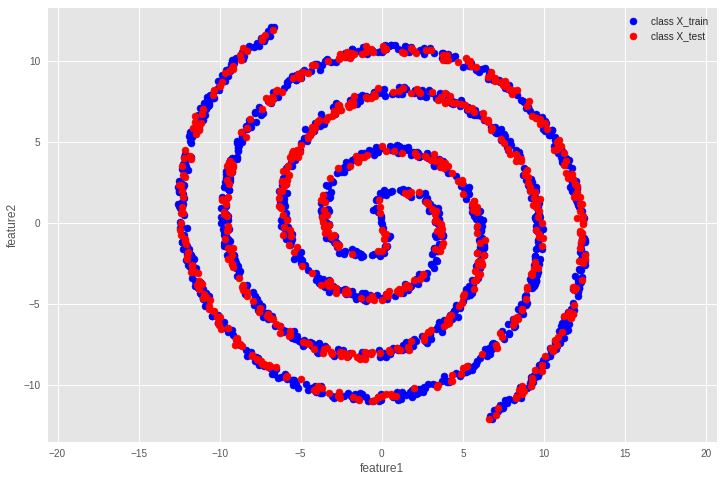

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

### 1.5 Checking the shape of the input data

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1340, 2)
y_train:	(1340,)
x_test:		(660, 2)
y_test:		(660,)


# 2. Create the network

### 2.1 Hyper-parameters

In [0]:
# Hyper-parameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.01 # The learning rate

### 2.2 Creating a model

In [0]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(14, input_dim=2, kernel_initializer='normal', activation='relu'))
  model.add(Dense(8,activation='relu'))
  # Output layer
  model.add(Dense(1, activation='sigmoid'))
 
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                42        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [0]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test.T),
 verbose = 0
)

### 2.4 Test the model

The model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)
print("Prediction values shape:", prediction_values.shape)

Prediction values shape: (660, 1)


### 2.5 Mean error value

In [0]:
print(np.mean(results.history["val_acc"]))

0.9473954543796452


### 2.6 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [0]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
1340/1340 [==============================] - 0s 19us/step
loss=0.0009, accuracy: 100.0000%
Evaluating on testing set...
660/660 [==============================] - 0s 25us/step
loss=0.0003, accuracy: 100.0000%


### 2.7 Summarize history for accuracy

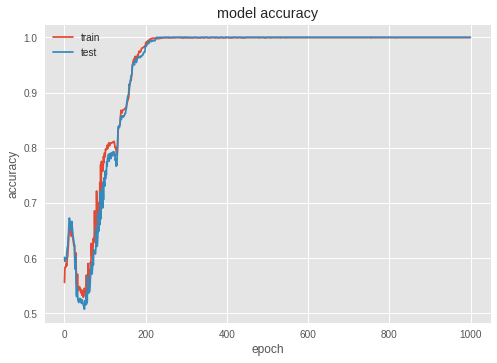

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

### 2.8 Summarize history for loss

Maximum Loss : 0.6740

Minimum Loss : 0.0009

Loss difference : 0.6730


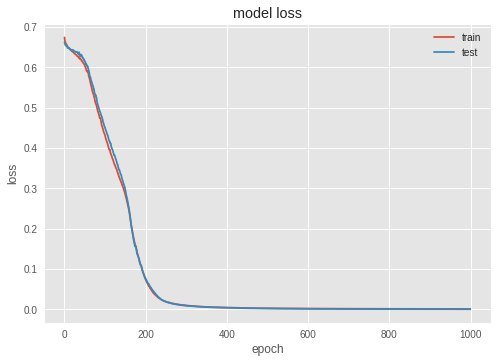

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# 3. Visualization

### 3.1 Visualization of the model predictions on our training set

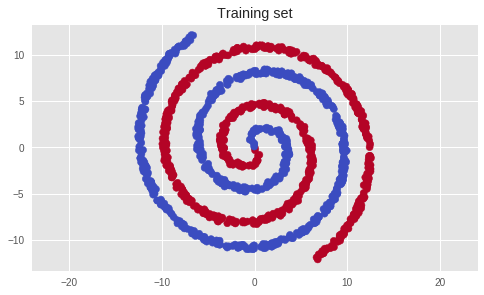

In [0]:
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

### 3.2 Visualization of the model predictions on our test set

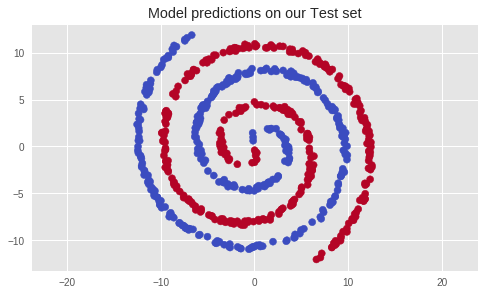

In [0]:
plt.figure(figsize =(8,10))
plt.subplot(212)
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

### 3.3 Class probability predictions for the test samples

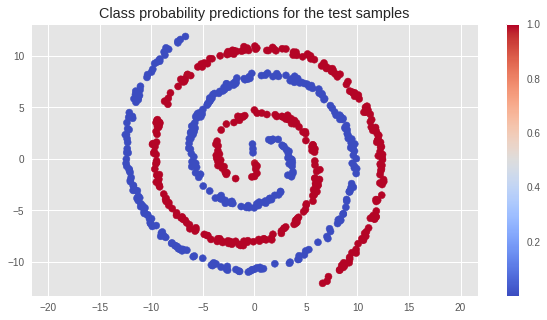

In [0]:
y_pp = model.predict_proba(X_test)

plt.figure(figsize =(10,5))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pp[:,0], cmap=cm.coolwarm)
plt.colorbar();
plt.title('Class probability predictions for the test samples')
plt.axis('equal');

### 3.4 We can now see how our model separates the classes.

Text(0.5, 1.0, 'Model predictions on our Test set')

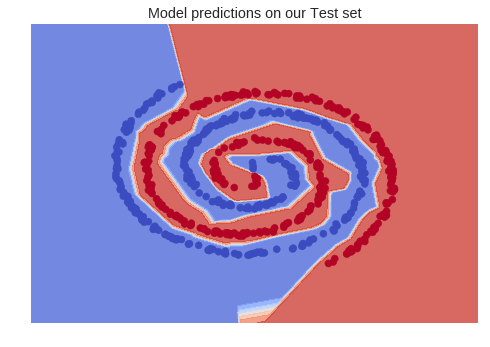

In [0]:
xx = np.linspace(-20, 20, 400)
yy = np.linspace(-20, 20, 400)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-20, 20])
axes.set_ylim([-20, 20])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')

### 3.5 Display the weights and biases of our model

In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

Input layer weights (2, 14) :
 [[-0.54658276  0.37977695  0.3451017   0.17843273  0.2387372  -0.6885682
  -0.0708255  -0.20927773  0.40932274 -0.43571702  0.41971886  1.0050683
  -0.55935526 -0.44516358]
 [-0.6788686   0.05170723  0.24903223 -0.08345564 -0.23130071 -0.07873649
  -0.4119475   0.694807    0.84312636  0.6499191   0.4075418  -0.76352936
  -0.7493027   0.19104199]]
Input layer biases (14,) :
 [ 1.9223076 -2.1596339 -2.2839944 -1.8293839 -1.9846448 -2.4721847
 -1.9076257 -2.764851  -0.7133607  1.3867362  2.5669434 -1.0349585
 -1.7439991 -1.9023899]

Hidden layer weights (14, 8) :
 [[ 4.00711387e-01 -1.17447853e+00  7.65735984e-01 -7.54579127e-01
  -6.98259056e-01  2.78512621e+00 -2.13248245e-02 -8.96943808e-01]
 [-9.03401971e-02 -8.14561069e-01 -1.68593836e+00 -2.83005929e+00
   1.24206543e+00 -6.43351376e-02  1.69551790e+00  6.64449930e-01]
 [ 7.34873640e-04  3.73340279e-01 -7.77973771e-01 -5.19737959e+00
   2.01033163e+00 -5.85541189e-01  2.05972695e+00  2.36452460e+00]
 [